In [7]:
import pandas as pd
from polygon import RESTClient
import time
import matplotlib.pyplot as plt

API_KEY = "qZjobWEw7wU6mutIdeE19pDHXcPzbp4R"

client = RESTClient(API_KEY)

tickers = ["PHM", "TOL"]
start_date = "2023-03-01"
end_date = "2024-03-01"

data_dict = {}

for ticker in tickers:
    try:
        bars = client.get_aggs(ticker=ticker, multiplier=1, timespan="day", from_=start_date, to=end_date)
        df = pd.DataFrame(bars)
        df["date"] = pd.to_datetime(df["timestamp"], unit="ms")  
        df.set_index("date", inplace=True)
        data_dict[ticker] = df["close"]
        print(f"✅ Downloaded data for {ticker}")
        time.sleep(1) 
    except Exception as e:
        print(f"❌ Failed to download {ticker}: {e}")

data = pd.DataFrame(data_dict)

data.head()

✅ Downloaded data for PHM
✅ Downloaded data for TOL


,PHM,TOL
date,,
2023-03-08 05:00:00,54.75,59.53
2023-03-09 05:00:00,54.44,58.29
2023-03-10 05:00:00,53.47,57.37
2023-03-13 04:00:00,54.21,57.40
2023-03-14 04:00:00,55.02,58.48


In [8]:
spread = data["PHM"] - data["TOL"]

rolling_mean = spread.rolling(window=30).mean()
rolling_std = spread.rolling(window=30).std()

z_score = (spread - rolling_mean) / rolling_std

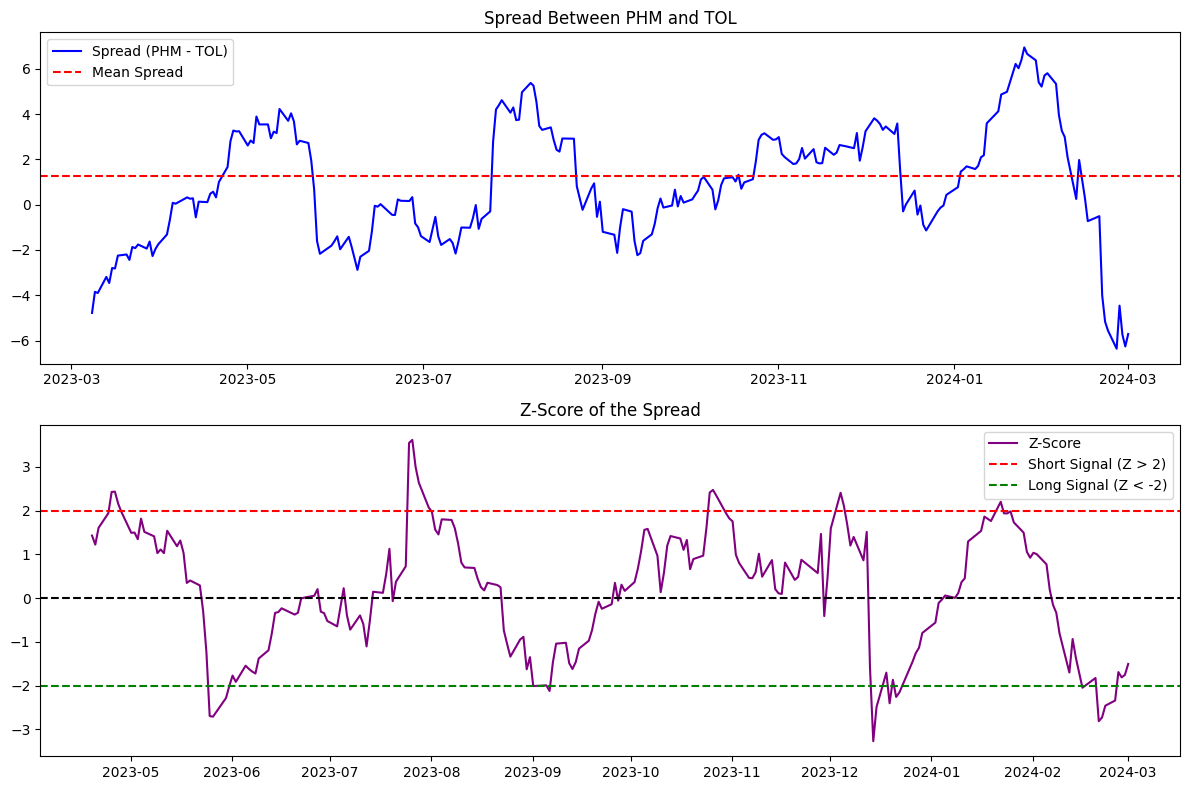

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

ax[0].plot(spread, label=f"Spread ({"PHM"} - {"TOL"})", color="blue")
ax[0].axhline(rolling_mean.mean(), color="red", linestyle="--", label="Mean Spread")
ax[0].set_title(f"Spread Between {"PHM"} and {"TOL"}")
ax[0].legend()

ax[1].plot(z_score, label="Z-Score", color="purple")
ax[1].axhline(0, color="black", linestyle="--")
ax[1].axhline(2, color="red", linestyle="--", label="Short Signal (Z > 2)")
ax[1].axhline(-2, color="green", linestyle="--", label="Long Signal (Z < -2)")
ax[1].set_title("Z-Score of the Spread")
ax[1].legend()

plt.tight_layout()
plt.show()